# Simple Opaque WDM Simulation

File that reads the binary file with the complete set of results from the simulation and plots the final results.

In [20]:
import pickle
import time
import networkx as nx
import matplotlib.pyplot as plt

import plots
import core
import graph

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
# reading the binary file with the results from the simulation
with open('./results/data/final_results.h5', 'rb') as file:
    data = pickle.load(file)
    print(data.keys())

dict_keys(['args', 'env', 'results', 'policies', 'loads', 'timedelta', 'datetime'])


In [25]:
data['env'].plot_formats = ['svg']
plots.plot_final_results(data['env'], data['results'], None, timedelta=data['timedelta'], show=True)

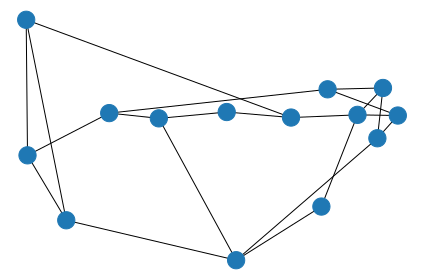

In [26]:
# reading the topology

topology = graph.get_topology(data['args'])
plt.figure()
plt.axis('off')
pos = nx.get_node_attributes(topology, 'pos')
nx.draw_networkx(topology, pos, with_labels=False)
plt.tight_layout()
plt.savefig(f"./results/{data['env'].output_folder}/topology.svg")
plt.show()